In [2]:
%cd ..

/home/tianshu/Documents/dart


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from dart import DartResult
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
def plot_map(fig, ax, mapfile, traj, layers=(80, 120), key="sigma"):
    squash = np.sum(mapfile[key][:, :, layers[0]:layers[1]], axis=2)
    xmin, ymin, zmin = mapfile["lower"].reshape(-1)
    xmax, ymax, zmax = mapfile["upper"].reshape(-1)

    val = int(len(traj) * 0.2)

    lower, upper = np.percentile(squash, (1, 99))
    ims = ax.imshow(
        np.rot90(np.clip(squash, lower, upper), k=1),
        extent=[xmin, xmax, ymin, ymax], aspect='equal')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    fig.colorbar(ims, cax)

    ax.plot(traj[:, 0][:-val], traj[:, 1][:-val], color='black')
    ax.plot(traj[:, 0][-val:], traj[:, 1][-val:], color='red')


def plot_maps(result, layers=(80, 120)):
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    mapfile = result.map()
    traj = result.data(["pos"])["pos"]

    plot_map(fig, axs[0], mapfile, traj, layers=layers, key="sigma")
    plot_map(fig, axs[1], mapfile, traj, layers=layers, key="alpha")

    for ax in axs:
        ax.grid()
    fig.tight_layout()
    return fig, axs

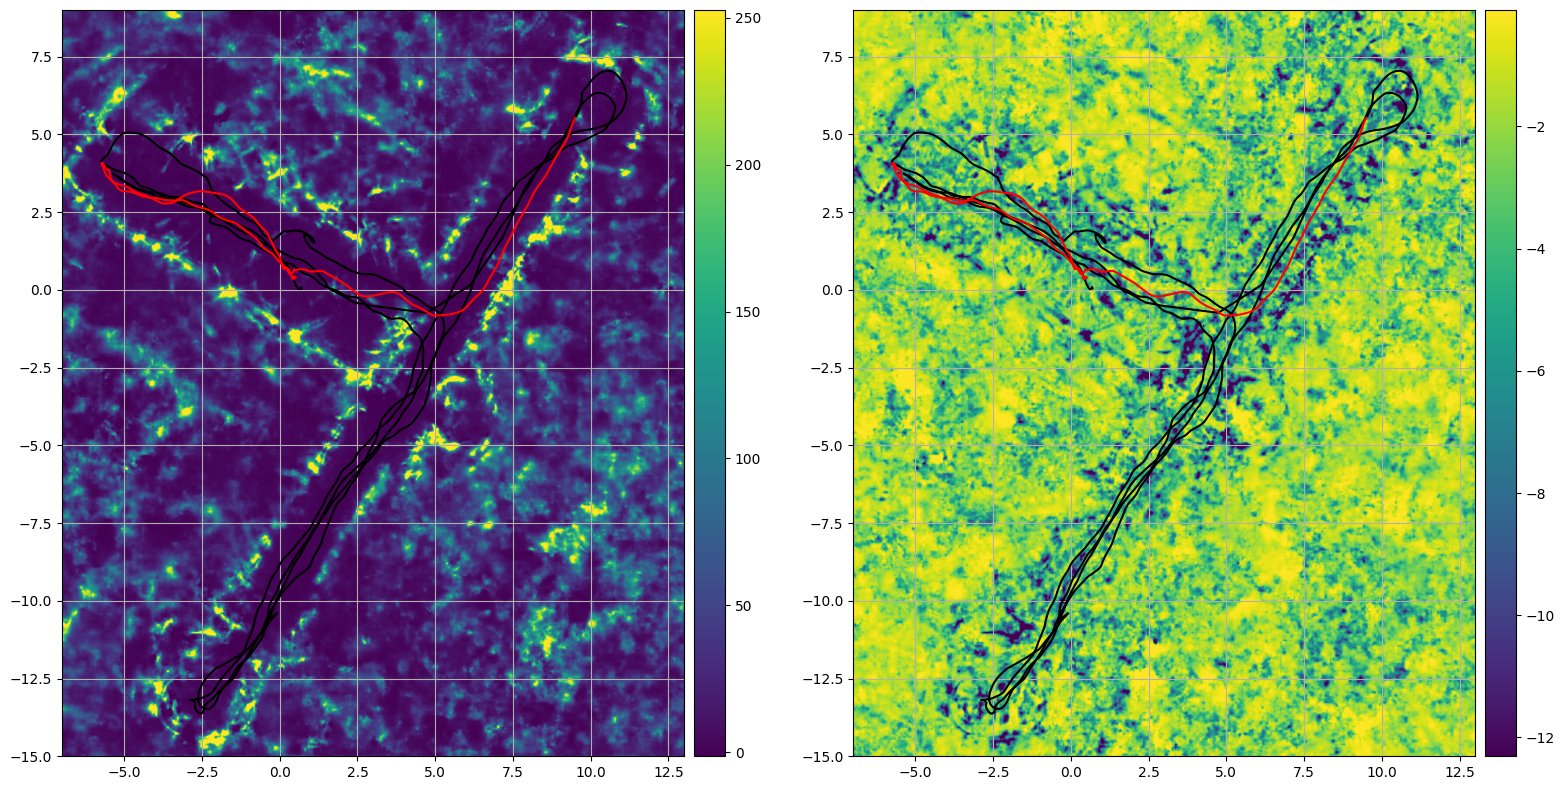

In [5]:
fig, axs = plot_maps(DartResult("results/cichall"))
for ax in axs.reshape(-1):
    ax.set_yticks(np.linspace(-15, 7.5, 10))

In [ ]:
fig, axs = plot_maps(DartResult("results/cichall-sh"))
for ax in axs.reshape(-1):
    ax.set_yticks(np.linspace(-15, 7.5, 10))